## Import dependencies

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

## Read the dataset

In [2]:
df = pd.read_csv("ParisHousing.csv")
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


## Data visualization

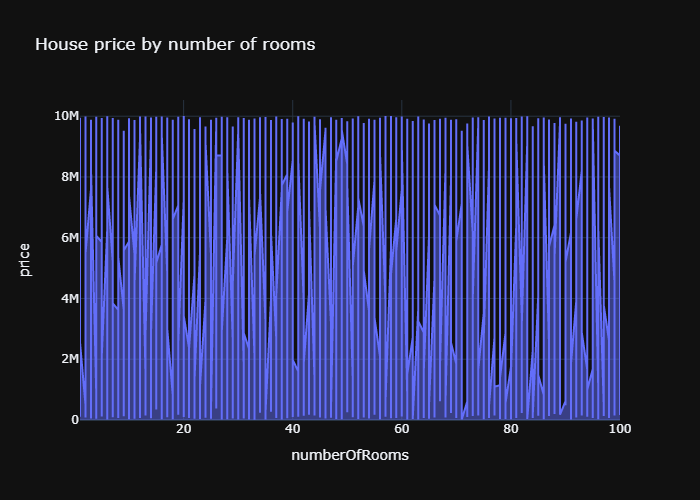

In [3]:
fig = px.area(df, x='numberOfRooms', y='price', template='plotly_dark', title='House price by number of rooms')
fig.show(renderer='png')

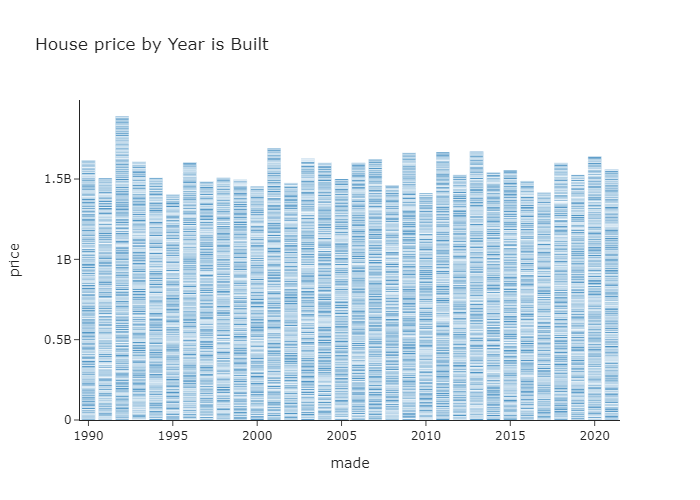

In [4]:
fig = px.bar(df, x='made', y='price', hover_data='squareMeters', template='simple_white', title='House price by Year is Built')
fig.show(renderer='png')

In [5]:
df['isNewBuilt'] = df['isNewBuilt'].map({1:'Yes', 0:'No'})
df.head(3)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,No,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,Yes,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,No,0,2937,8852,135,1,9,5574642.1


In [6]:
df2 = df.groupby('isNewBuilt')['price'].agg(['mean', 'max']).reset_index()
df2

,isNewBuilt,mean,max
0,No,5.024015e+06,10004278.3
1,Yes,4.962770e+06,10006771.2


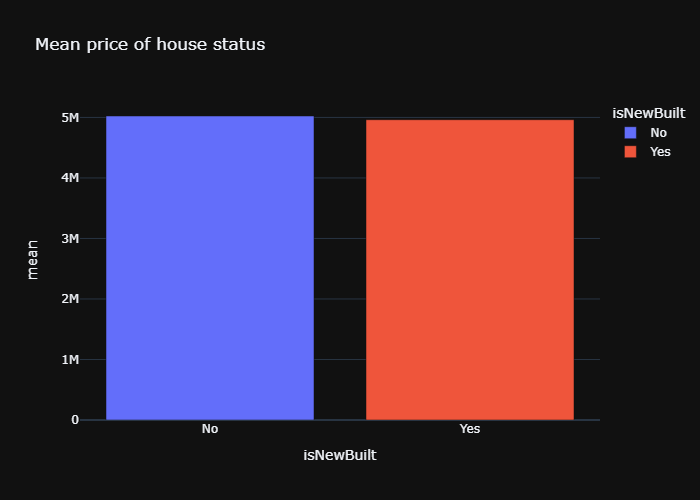

In [7]:
fig = px.bar(df2, x='isNewBuilt', y='mean', template='plotly_dark', color='isNewBuilt', title='Mean price of house status')
fig.show(renderer='png')

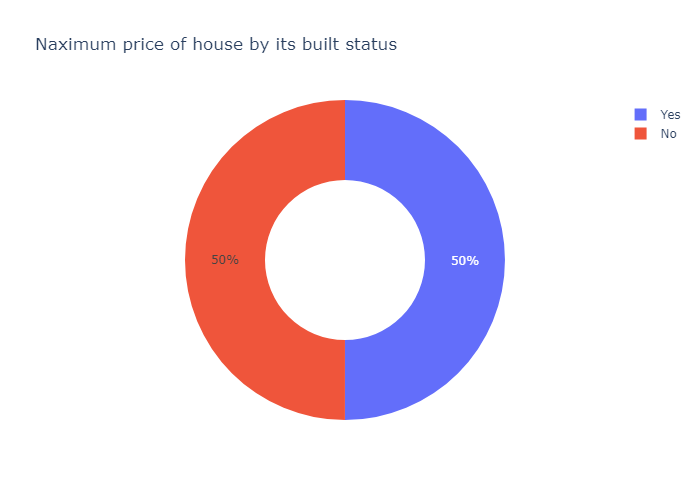

In [8]:
fig = px.pie(df2, names='isNewBuilt', values='max', hole=0.5, title='Naximum price of house by its built status')
fig.show(renderer='png')

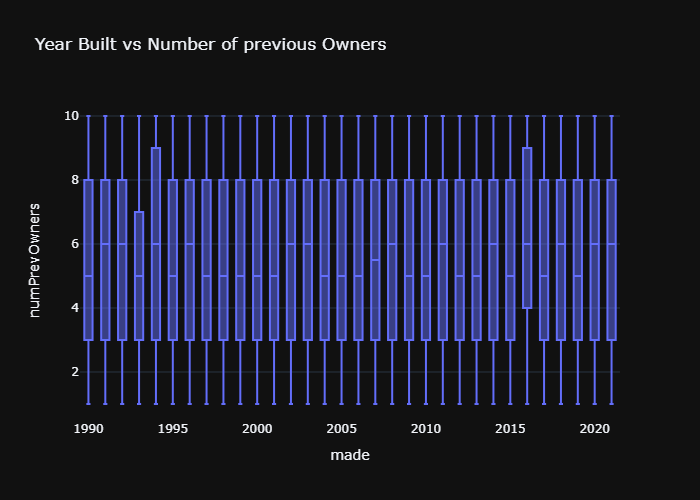

In [9]:
fig = px.box(df, x='made', y='numPrevOwners', template='plotly_dark', title='Year Built vs Number of previous Owners')
fig.show(renderer='png')

In [10]:
df.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [11]:
df['hasPool'] = df['hasPool'].map({0:'No', 1:'Yes'})

In [12]:
df2 = df.groupby('hasPool')['price'].min().reset_index()
df2

,hasPool,price
0,No,10313.5
1,Yes,14431.3


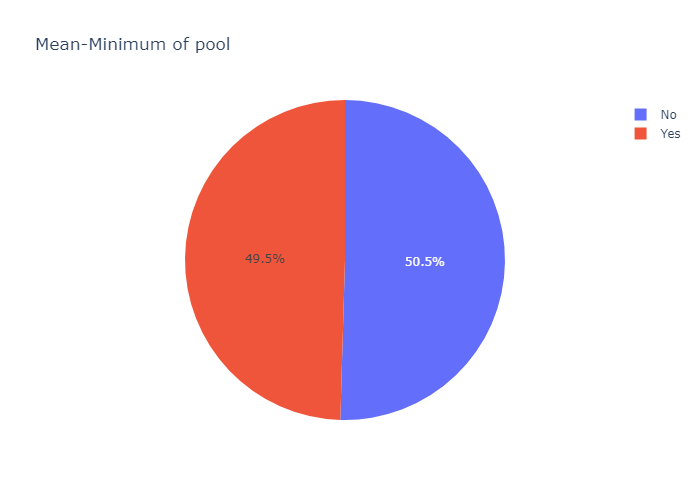

In [13]:
fig = px.pie(df, names='hasPool', values='price', title='Mean-Minimum of pool')
fig.show(renderer='png')

In [14]:
num = df.select_dtypes('number')
z = num.corr() 

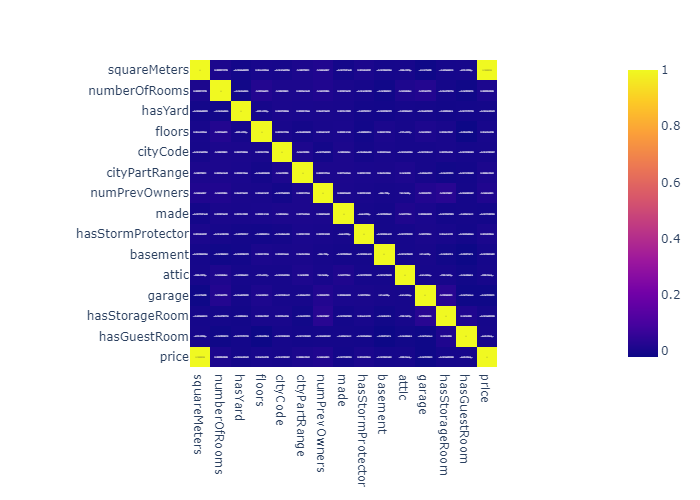

In [15]:
fig = px.imshow(z, text_auto=True)
fig.show(renderer='png')

#### NB: I made use of the parameter(renderer='png'), to enable my charts display on github coz github does not surport interactive chart like plotly...to make the chart interactive you can delete the parameter "renderer"

## Data wrangling
checkout for null-datapoints

In [4]:
print(df.shape, df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [5]:
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

## check for duplicates

In [6]:
df.duplicated().sum()

0

## pop off unnecessary features

In [4]:
drop_features = ['made', 'numPrevOwners', 'attic', 'basement', 'cityCode', 'cityPartRange', 'floors', 'hasStorageRoom', 'hasGuestRoom', 'hasStormProtector']

df = df.drop(drop_features, axis=1)
df.head(3)

,squareMeters,numberOfRooms,hasYard,hasPool,isNewBuilt,garage,price
0,75523,3,0,1,0,956,7559081.5
1,80771,39,1,1,1,128,8085989.5
2,55712,58,0,1,0,135,5574642.1
3,32316,47,0,0,0,359,3232561.2
4,70429,19,1,1,1,292,7055052.0
...,...,...,...,...,...,...,...
9995,1726,89,0,1,0,218,176425.9
9996,44403,29,1,1,0,230,4448474.0
9997,83841,3,0,0,1,345,8390030.5
9998,59036,70,0,0,0,339,5905107.0


In [8]:
print(df.columns, df.shape)

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'isNewBuilt',
       'garage', 'price'],
      dtype='object') (10000, 7)


## split the dataset into training/testing set

In [3]:
train_set = df.sample(frac=0.8, random_state=0)
test_set = df.drop(train_set.index)

## split features from labels/target variable

In [4]:
train_features = train_set.copy()
test_features = test_set.copy()

train_labels = train_features.pop('price')
test_labels = test_features.pop('price')


## Normalize the data

In [11]:

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))



## model the data using sequential DNN

In [12]:
model = keras.models.Sequential([
    normalizer,
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(units=1, activation='linear')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,230
Trainable params: 9,217
Non-trainable params: 13
_________________________________________________________________


## Compile the model

In [29]:
loss = keras.losses.mean_absolute_error
optim = keras.optimizers.Adam(learning_rate=0.001)
metric = ['mean_absolute_error']


model.compile(loss=loss, optimizer=optim, metrics=metric)

## Fit the model for training

In [30]:
history = model.fit(train_features, train_labels,
                    batch_size=64,
                    epochs=50,
                    verbose=2,
                    validation_split=0.2)


Epoch 1/50
100/100 - 2s - loss: 3444.7078 - mean_absolute_error: 3444.7078 - val_loss: 2319.9390 - val_mean_absolute_error: 2319.9390 - 2s/epoch - 15ms/step
Epoch 2/50
100/100 - 0s - loss: 2226.3120 - mean_absolute_error: 2226.3120 - val_loss: 2253.6611 - val_mean_absolute_error: 2253.6611 - 319ms/epoch - 3ms/step
Epoch 3/50
100/100 - 0s - loss: 2167.3430 - mean_absolute_error: 2167.3430 - val_loss: 2365.0186 - val_mean_absolute_error: 2365.0186 - 323ms/epoch - 3ms/step
Epoch 4/50
100/100 - 0s - loss: 2146.8835 - mean_absolute_error: 2146.8835 - val_loss: 2177.3335 - val_mean_absolute_error: 2177.3335 - 320ms/epoch - 3ms/step
Epoch 5/50
100/100 - 0s - loss: 2131.5220 - mean_absolute_error: 2131.5220 - val_loss: 2436.8606 - val_mean_absolute_error: 2436.8606 - 306ms/epoch - 3ms/step
Epoch 6/50
100/100 - 0s - loss: 2167.5210 - mean_absolute_error: 2167.5210 - val_loss: 2400.7649 - val_mean_absolute_error: 2400.7649 - 373ms/epoch - 4ms/step
Epoch 7/50
100/100 - 0s - loss: 2101.6689 - mean

In [5]:
df['price'].describe()

count    1.000000e+04
mean     4.993448e+06
std      2.877424e+06
min      1.031350e+04
25%      2.516402e+06
50%      5.016180e+06
75%      7.469092e+06
max      1.000677e+07
Name: price, dtype: float64

In [32]:
evaluate = model.evaluate(test_features, test_labels, verbose=1)




63/63 [==============================] - 0s 3ms/step - loss: 2074.7144 - mean_absolute_error: 2074.7144


In [33]:
predict = model.predict(test_features)
for i in predict:
    print(i)
 

63/63 [==============================] - 0s 2ms/step
[7558172.]
[1314139.8]
[9241077.]
[2090719.1]
[9518208.]
[1186465.5]
[2619399.8]
[6665996.]
[2881107.]
[7008247.5]
[6314221.]
[6713242.5]
[3915265.]
[4363367.]
[6002843.5]
[9255399.]
[4510547.]
[6159624.]
[8415358.]
[7767010.]
[66394.09]
[3500586.]
[5146213.]
[2319975.8]
[3954593.2]
[5525750.5]
[1792875.]
[1651975.4]
[3916661.5]
[6524516.]
[1336953.4]
[2737666.8]
[8196686.]
[9976227.]
[3609151.]
[2280101.]
[1488377.4]
[7315317.]
[4674385.]
[6922780.5]
[828729.2]
[4151275.2]
[8733065.]
[7521605.]
[3277424.2]
[2862405.2]
[3480312.8]
[1738263.5]
[2074394.9]
[900511.44]
[2719215.8]
[2395369.2]
[6847614.]
[8738542.]
[9675295.]
[6530734.5]
[6680478.]
[2310327.2]
[7093075.]
[8454763.]
[3953842.5]
[261422.38]
[8789475.]
[4162866.2]
[4730021.]
[5654086.]
[5835544.]
[5273457.5]
[2044674.]
[2983909.8]
[5028264.]
[9503014.]
[1065846.4]
[7215056.5]
[1970703.1]
[1901361.5]
[651299.06]
[5165342.]
[2444716.2]
[5749735.]
[8100583.]
[4836204.]
[767798

In [34]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,isNewBuilt,garage,price
0,75523,3,0,1,0,956,7559081.5
1,80771,39,1,1,1,128,8085989.5
2,55712,58,0,1,0,135,5574642.1
3,32316,47,0,0,0,359,3232561.2
4,70429,19,1,1,1,292,7055052.0
...,...,...,...,...,...,...,...
9995,1726,89,0,1,0,218,176425.9
9996,44403,29,1,1,0,230,4448474.0
9997,83841,3,0,0,1,345,8390030.5
9998,59036,70,0,0,0,339,5905107.0


In [35]:
model.predict([[83841,3,0,0,1,345]])

1/1 [==============================] - 0s 150ms/step


array([[8386960.5]], dtype=float32)

## Save the trained model

In [36]:
model.save('model.tf')

INFO:tensorflow:Assets written to: model.tf\assets
